IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

*zeng fanxiang , hebert thomas*

<b>Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.</b>
Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

<b>Les groupes de plus de 2 personnes ne sont pas autorisés.</b>

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2022


<font size="+1" color="RED"><b>Date de rendu : lundi 9 mai, 19h au plus tard</b></font>
    
(<b>attention! le site Moodle ferme à 19h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...)


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données Agribalise qui sont des données ouvertes dont la documentation peut être consultée ici : https://doc.agribalyse.fr/documentation/acces-donnees

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- Donnees_Agribalyse/
                  -- detail_ingredient.csv
                  -- detail_etape.csv
                  -- synthese.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive du répertoire iads/
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: Les fichiers de données ne doivent pas être inclus dans votre archive !

## Soutenance des projets
La soutenance sera organisée après la semaine d'examens de mai entre le 17 et le 25 mai (la date sera précisé sur le forum du Moodle).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




## Exemples

In [124]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
data_synthese = pd.read_csv("Donnees_Agribalyse/synthese.csv")
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))

Nombre de lignes:  2479


In [126]:
nom_colums_synthese = data_synthese.columns


In [127]:
data_synthese.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
5,13001,13001,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, sec","Apricot, pitted, dried",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.315730,0.041668,0.156978,1.036479,4.955795,248.627750,260.488540,7.717328,184.622520,11.016019


In [128]:
data_ingredient = pd.read_csv("Donnees_Agribalyse/detail_ingredient.csv")
data_ingredient.columns
print("Nombre de lignes: ",len(data_ingredient))

Nombre de lignes:  5671


In [129]:
nom_colums_ingre = data_ingredient.columns

In [130]:
data_ingredient.loc[0:5]

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
4,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Autres étapes,0.080761,0.571172,0.126768,...,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583
5,24664,24664,Gâteau aux amandes type financier,produits céréaliers,gâteaux et pâtisseries,Almond cake,Amande,0.349367,0.914647,0.070591,...,0.098041,0.012824,0.046970,0.406947,4.767077,64.110420,49.548089,27.024469,11.359491,8.104749


In [131]:
data_etape = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")
data_etape.columns
print("Nombre de lignes: ",len(data_etape))

Nombre de lignes:  2480


In [132]:
nom_colums_etape = data_etape.columns

In [133]:
data_etape.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",2.24,Abondance (12112),0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",2.46,"Abricot au sirop léger, appertisé, égoutté (13...",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",2.46,"Abricot au sirop léger, appertisé, non égoutté...",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",2.46,"Abricot au sirop, appertisé, égoutté (13714)",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",2.44,"Abricot au sirop, appertisé, non égoutté (13715)",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97
5,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",2.20,"Abricot, dénoyauté, cru (13000)",0.061101,0.000000,...,1.277733,0.000000,0.150130,0.533833,0.205231,0.006400,1.96,3.54,1.66,1.66


# superviser

## problematique 
* comment en fonction de des score unique EF ,

# fiablisation des données et réduction des données

* les données avec un DQR, note de qualité de la donnée, >= 3  ne sont pas fiable dans les donées
* de nombreux colonne sont inutile pour notre analyse du coup nous allons enlever ces colonnes 


In [134]:
data_synthese = data_synthese[data_synthese["DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)"] < 2.5]
#data_synthese



In [135]:
full_cols = data_synthese.columns

In [136]:
cols = [
    "Changement climatique (kg CO2 eq/kg de produit)",
    "Particules (E-06 disease inc./kg de produit)",
    "Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)"
    ]

full_cols = data_synthese.columns

data_synthese_red = data_synthese[cols]



In [137]:
desc= np.array(data_synthese_red)
label = np.array(data_synthese["Groupe d'aliment"])


In [138]:
import graphviz as gv
arbre = cl.ClassifierArbreNumerique(len(cols), 0.0 , cols)
arbre.train(desc, label)
print(arbre.accuracy(desc, label))

1.0


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.966008 to fit


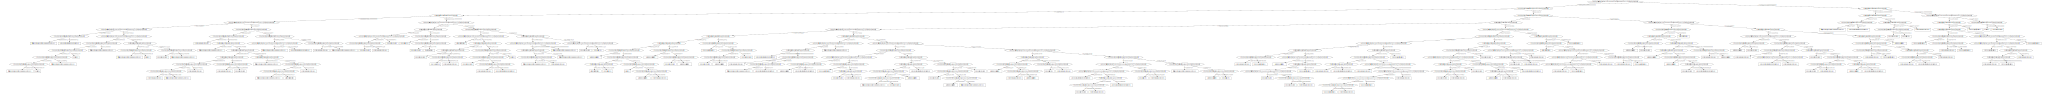

In [139]:
graphe_arbre_1 = gv.Digraph(format='png')
arbre.affiche(graphe_arbre_1)
graphe_arbre_1.render("tree")
graphe_arbre_1


In [140]:
index = np.random.permutation(len(desc)) # mélange des index
XtoyMelange = desc[index]
YtoyMelange = label[index]

learn_rate = 0.01
seuil = 0.001

n_fold = 10

cross_acc_test = []


for i in range(n_fold):
    Xapp,Yapp,Xtest,Ytest = ut.crossval(XtoyMelange, YtoyMelange, n_fold, i)
    #print("========== ITERATION : ",i," ==========")
    #print(" Xapp=", Xapp.T,"\n","Yapp=", Yapp,"\n","Xtest=",Xtest.T,"\n","Ytest=", Ytest)
    tree_cross = cl.ClassifierArbreNumerique (len(cols) , 0 , cols) 
    tree_cross.train(Xapp , Yapp)
    
    res_test = tree_cross.accuracy(Xtest,Ytest)
    cross_acc_test.append(res_test)
    #print(res_test)

print("accuracie des test a chaque iteration",cross_acc_test )
print("moyenne des accuracy :" , np.asarray(cross_acc_test).mean())

accuracie des test a chaque iteration [0.7564102564102564, 0.8860759493670886, 0.759493670886076, 0.8354430379746836, 0.7468354430379747, 0.6410256410256411, 0.7721518987341772, 0.7215189873417721, 0.8354430379746836, 0.6708860759493671]
moyenne des accuracy : 0.762528399870172
